<a href="https://colab.research.google.com/github/KDcodePy/Sales-prediction/blob/main/Sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales Prediction

Kim Hazed Delfino

## Loading Data 
- Use Pandas to read the sales prediction data set into Google Colab
- Use df.info() and df.head() methods to preview the first rows of your data and a summary of your DataFrame's columns.

##Data Cleaning
- Explore the data - what do you need to do to clean this data? Clean it!
- Be sure to address each of the following tasks:


## Exploratory Visuals

## Explanatory Visuals

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
filename = "/content/drive/MyDrive/sales_predictions.csv"

In [5]:
df = pd.read_csv(filename)

In [6]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
counts_row=len(df)

In [9]:
counts_columns=len(df.columns)

In [10]:
print(f"There are {counts_row} rows and {counts_columns} columns in this data set")

There are 8523 rows and 12 columns in this data set


In [11]:
for col in df.columns:
  print(f"column {col} is a {df[col].dtypes} type")
  

column Item_Identifier is a object type
column Item_Weight is a float64 type
column Item_Fat_Content is a object type
column Item_Visibility is a float64 type
column Item_Type is a object type
column Item_MRP is a float64 type
column Outlet_Identifier is a object type
column Outlet_Establishment_Year is a int64 type
column Outlet_Size is a object type
column Outlet_Location_Type is a object type
column Outlet_Type is a object type
column Item_Outlet_Sales is a float64 type


In [12]:
print(f"There are {df.duplicated().sum()} duplicates")

There are 0 duplicates


-Since almost all of the unique `Item_Identifier` occurred multiple times, we can just get the `mean` value of that `Item_Identifier` and apply it on `NaN`
-replaced all the `NaN` values into `0` values so i can reference them inside my for loop



In [13]:
df["Item_Weight"].fillna(0,inplace=True)

In [14]:
counter = 0
print("Working on my magic", end='')
for item in df['Item_Identifier']:
  if  df.iloc[counter,1] == 0:
    df.iat[counter,1]=df[df["Item_Identifier"] == item]["Item_Weight"].mean()

  if counter % 100 == 0:
    print(".",end='')
  counter += 1
print("Done!") 


Working on my magic......................................................................................Done!


- we still have 4 rows that has `0` values, this night cause some issues on our prediction later down the line so we can just change it into `median` values of the entire column.

In [15]:
df[df["Item_Weight"] == 0]


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,0.0,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,0.0,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,0.0,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,0.0,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


- Created a `list of index` with all the rows that still has `0` values so i can just loop through the list and use it as index value for .iloc
- changed the `0` values into `median` values of the entire column.

In [16]:
index_list = [927,1922,4187,5022]

In [17]:
for index in index_list:  
  df.iloc[index,1] = df["Item_Weight"].median()

In [18]:
df[df["Item_Weight"] == 0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [19]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

- replaced `NaN` values with `Missing` values for the 2410 rows since it's more than 2% and less than 80% of the entire dataset for us to consider deleting the column.

In [20]:
df["Outlet_Size"].fillna("Missing", inplace=True) 

In [21]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [22]:
df["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [23]:
df.replace({"LF":"Low Fat","reg":"Regular","low fat":"Low Fat"}, inplace=True)

In [24]:
df["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [26]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.372472,0.066132,140.992782,1997.831867,2181.288914
std,4.633512,0.051598,62.275067,8.371760,1706.499616
min,1.800000,0.000000,31.290000,1985.000000,33.290000
25%,8.365000,0.026989,93.826500,1987.000000,834.247400
50%,12.150000,0.053931,143.012800,1999.000000,1794.331000
75%,16.200000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [31]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#Data Visualization 

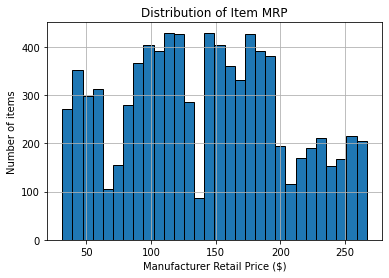

In [39]:
ax = df["Item_MRP"].hist(bins= 30, edgecolor = 'black')
ax.ticklabel_format(style='plain')
ax.set_title('Distribution of Item MRP')
ax.set_xlabel('Manufacturer Retail Price ($)')
ax.set_ylabel('Number of items');


  - Here we can see that majority of items in our dataset are within $100~200 Price range.

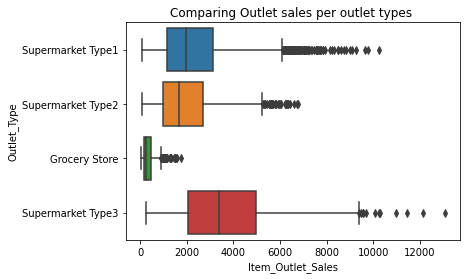

In [71]:
ax = sns.boxplot(x="Item_Outlet_Sales" , y= "Outlet_Type", data=df)
ax.set_title("Comparing Outlet sales per outlet types ");

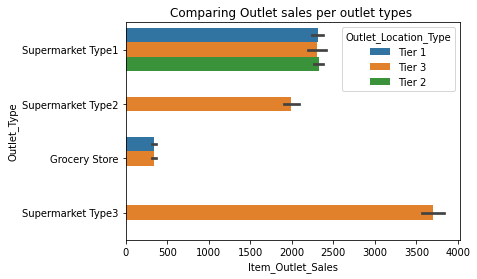

In [76]:
ax = sns.barplot(data=df, x="Item_Outlet_Sales", y="Outlet_Type",hue="Outlet_Location_Type")
ax.set_title("Comparing Outlet sales per outlet types ");


  - Here we can see that Supermarket Type3 on Location Tier3 is outperforming other types in terms of average sales 


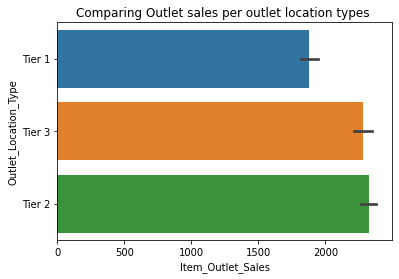

In [75]:
ax = sns.barplot(data=df, x="Item_Outlet_Sales", y="Outlet_Location_Type")
ax.set_title("Comparing Outlet sales per outlet location types ");

- Here we can see that Tier2 outlet location type is outperforming Tier1 and Tier3 in terms of average sales 

In [51]:
corr = df.corr()

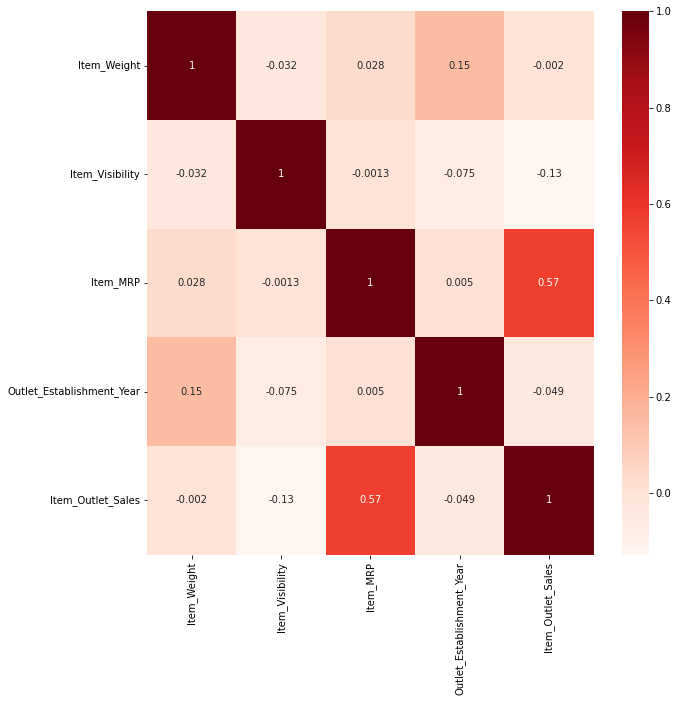

In [60]:
fix, ax = plt.subplots(figsize= (10,10))
ax = sns.heatmap(corr, cmap='Reds', annot = True);

- Here we can see that Item_MRP has moderate correlation with Item_Outlet_Sales 